# Breast Cancer Classification By SVM With Hyper Parameter Tuning

In [1595]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,classification_report,roc_curve, auc

In [1596]:
#Reading Data
Data=pd.read_csv(r"E:\Python\Breast_Cancer_Data_set\data.csv")

In [1597]:
#Printing first 5 Data points
Data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [1598]:
#Column names
Data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [1599]:
Data=Data.iloc[:,1:-1] # Dropping the id and Unnamed: 32 column

In [1600]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [1601]:
Data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Encode the Target as Malignant : 1 and Benign : 2

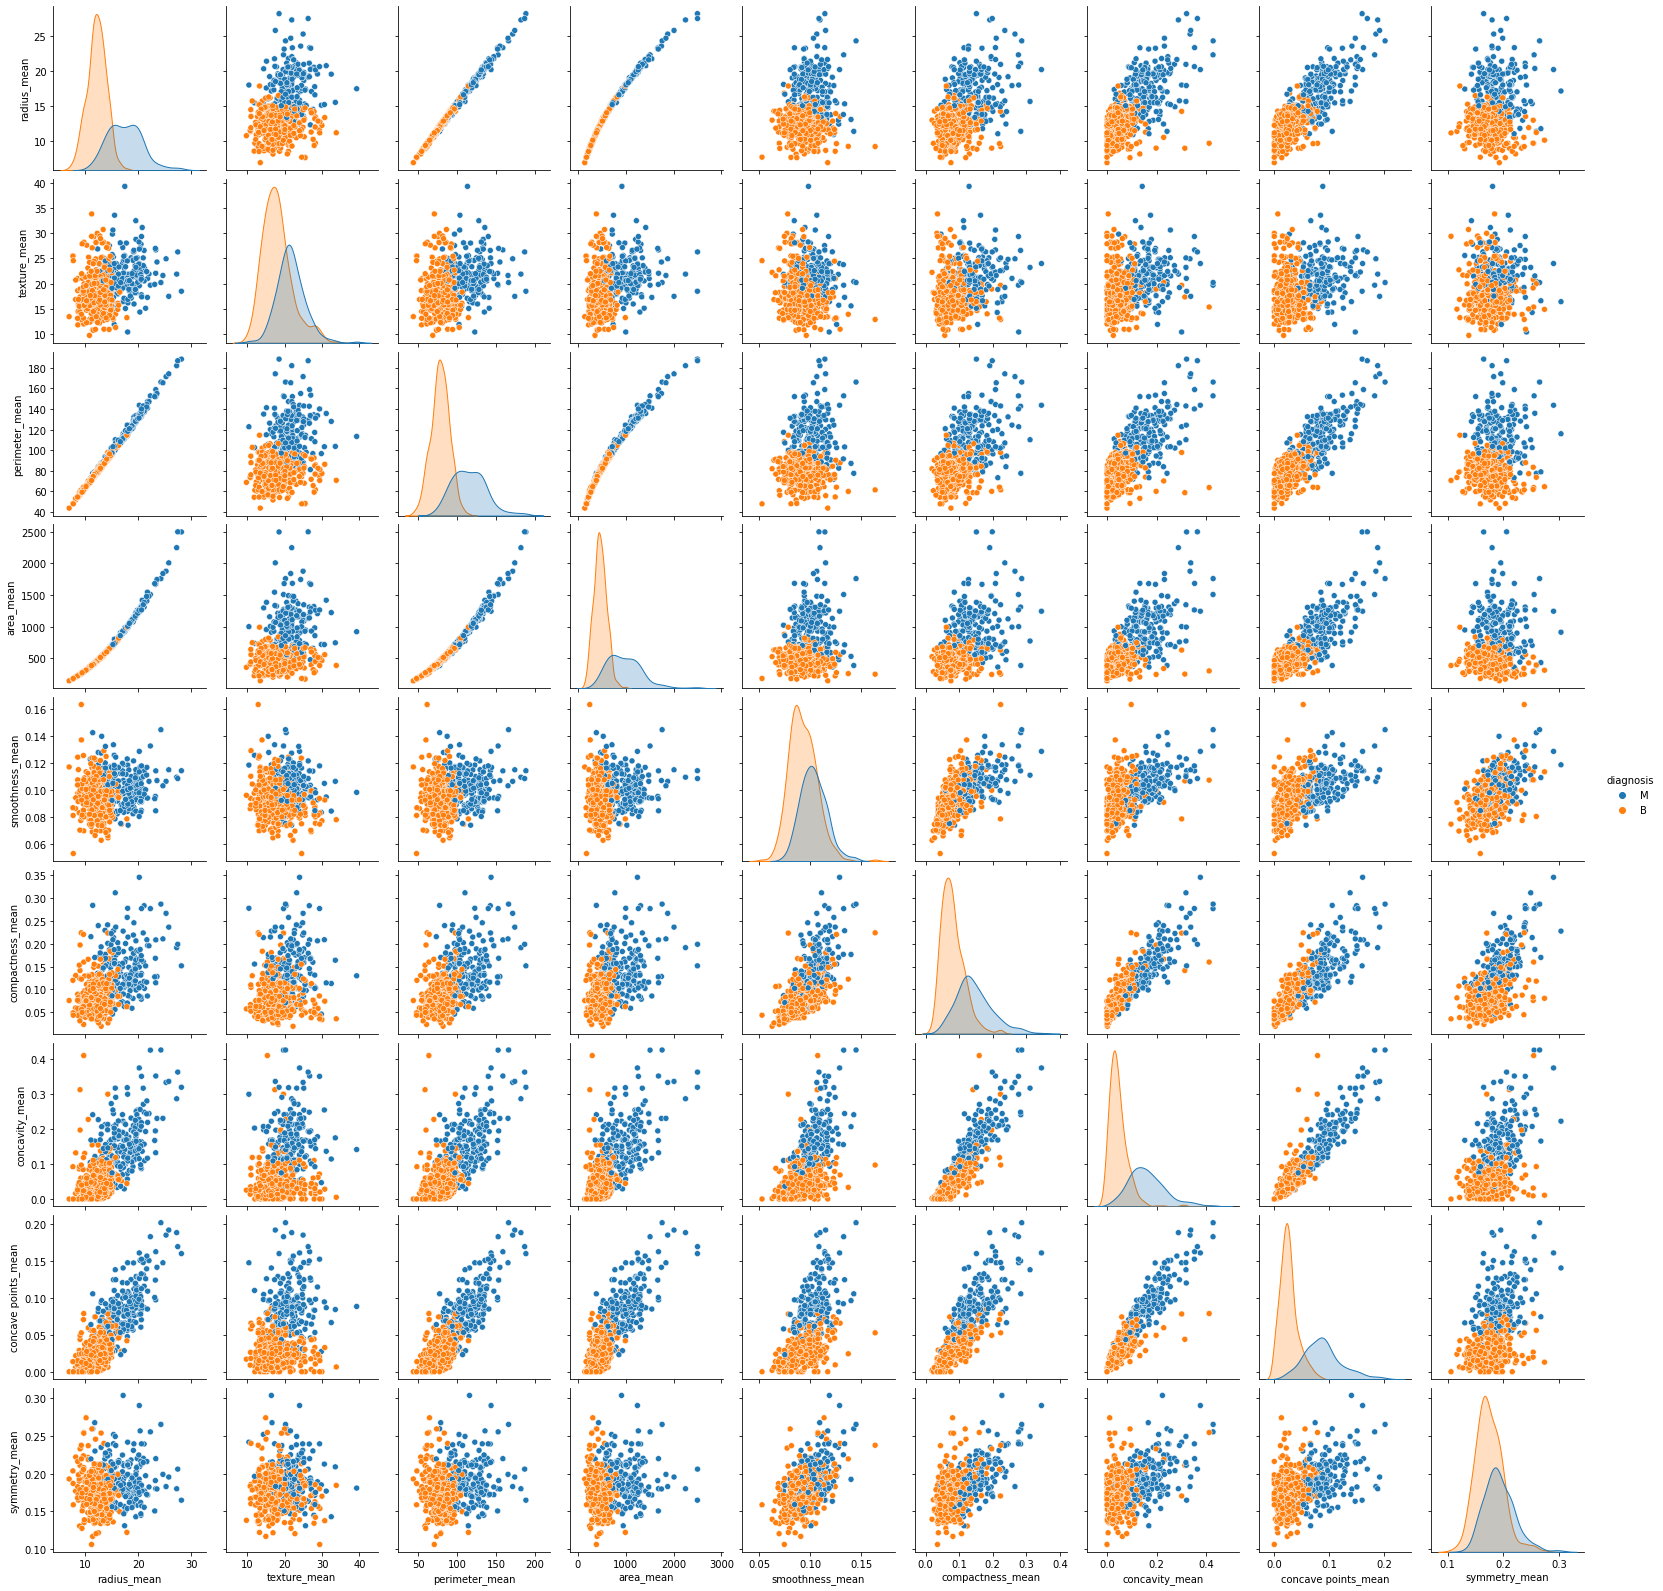

In [1602]:
#Data Visualisation by pairplot of first 10 features and hue on 'diagnosis'. This helps to visualise the features relationships
sns.pairplot(Data.iloc[:,0:10], hue = 'diagnosis')
plt.show()

Some the features are linearly correlated and some are quadratically. Some of them we can't assume any pattern, they are uncorrelated Data

<AxesSubplot:>

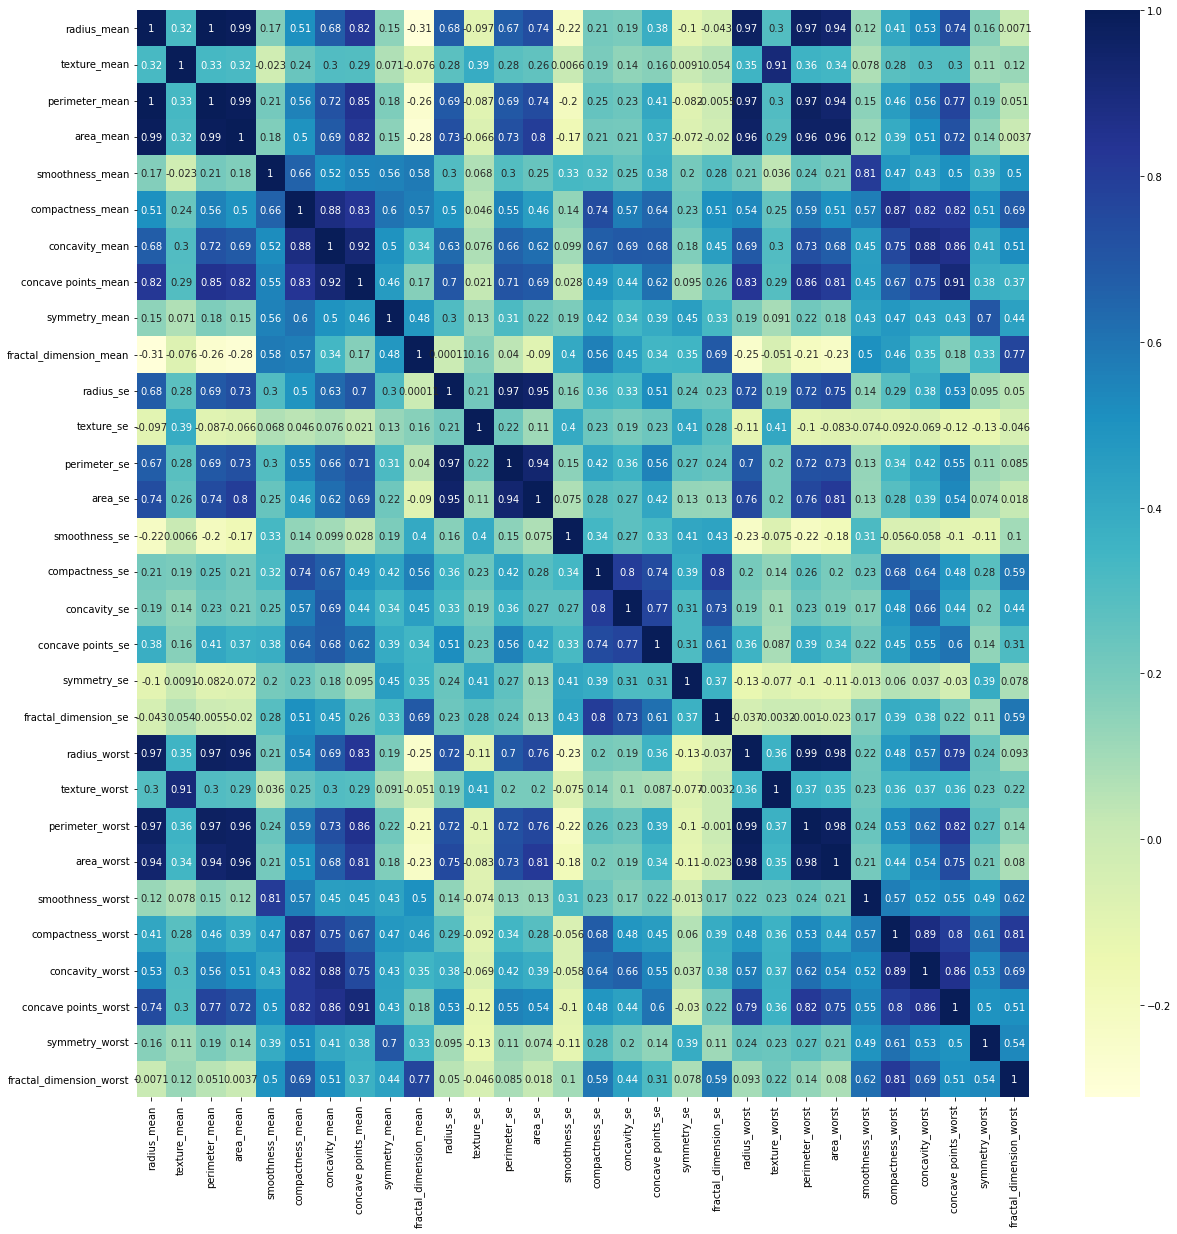

In [1603]:
#Prview of the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),cmap="YlGnBu",annot=True)

In [1604]:
# Feature elimination of by Correlation
def correlation(data,thresh):#thresh = 0.9, so any correlation above 0.9 we will drop those features
    columns_to_drop=[]
    corr_mat=data.corr()
    for i in range(len(corr_mat.columns)):
        #print(len(corr_mat.columns[i+1:]))
        for j in range(i+1,i+1+len(corr_mat.columns[i+1:])):
            if abs(corr_mat.iloc[i,j])>thresh:
                #print("first",i,corr_mat.columns[i])
                #print(j,corr_mat.columns[j])
                columns_to_drop.append(corr_mat.columns[j])
    return np.array(columns_to_drop)                          

In [1605]:
len(np.unique(correlation(Data,0.89)))#Total 11 features to drop

11

In [1606]:
A=np.unique(correlation(Data,0.89))#13 Features to be dropped
Data_dropped=Data.drop(A,axis=1)

In [1607]:
Data_dropped.head()#Less correlated Data Post Feature engineering

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.2364,0.07678


In [1608]:
"""sns.pairplot(Data_dropped.iloc[:,0:-1], hue = 'diagnosis')
plt.show()"""

"sns.pairplot(Data_dropped.iloc[:,0:-1], hue = 'diagnosis')\nplt.show()"

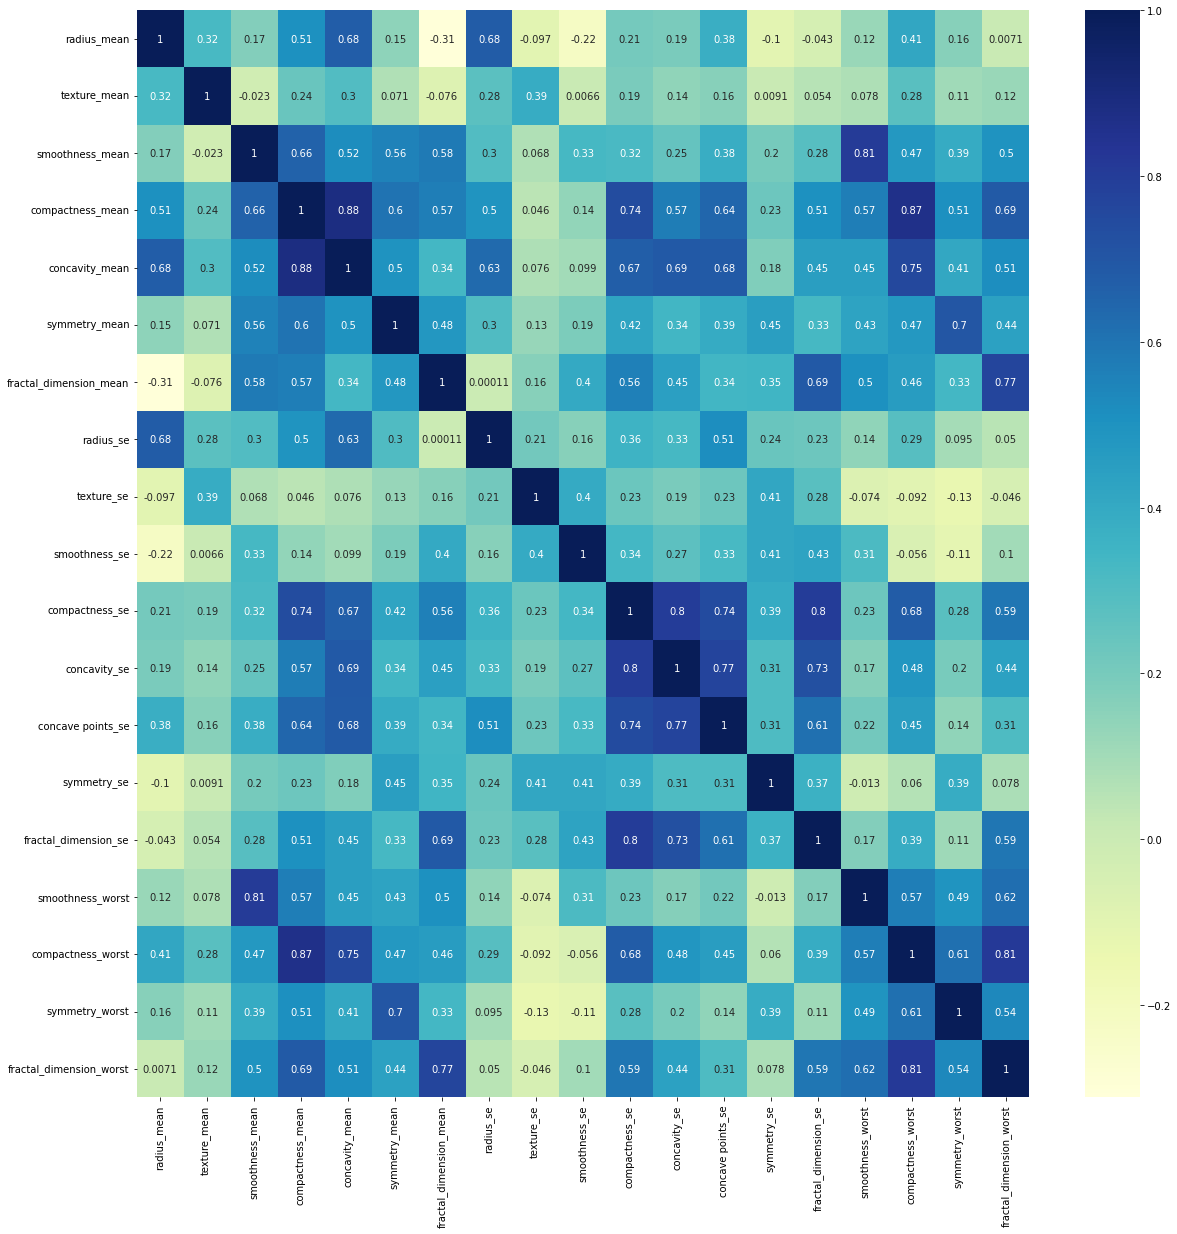

In [1609]:
plt.figure(figsize=(20,20))
sns.heatmap(Data_dropped.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [1610]:
Target=Data_dropped.pop('diagnosis')
le=LabelEncoder()
encTarget=le.fit_transform(Target)
X_train,X_test,y_train,y_test=train_test_split(Data_dropped,encTarget,random_state=42,test_size=0.30)

In [1611]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [1612]:
#Hyper parameter Tuning using Grid Search CV and searching for best kernel
parameters={'C':[0.001,0.01,0.1,0.75,1,1.1,10,20,30,40],'kernel':['linear','poly']}
clf=GridSearchCV(estimator=SVC(probability=True),param_grid=parameters,scoring='accuracy',cv=5,n_jobs=-1)

In [1613]:
clf.fit(X_train,y_train)#Fitting of Data

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.75, 1, 1.1, 10, 20, 30, 40],
                         'kernel': ['linear', 'poly']},
             scoring='accuracy')

In [1614]:
clf.best_estimator_

SVC(C=0.75, kernel='linear', probability=True)

In [1615]:
result=pd.DataFrame(clf.cv_results_)

In [1616]:
result.drop(['mean_fit_time','std_fit_time','std_score_time','param_C','param_kernel','split0_test_score','split1_test_score',
             'split2_test_score','split3_test_score','split4_test_score','std_test_score'],axis=1,inplace=True)
result#Displaying result

,mean_score_time,params,mean_test_score,rank_test_score
0,0.000000,"{'C': 0.001, 'kernel': 'linear'}",0.829146,17
1,0.002603,"{'C': 0.001, 'kernel': 'poly'}",0.630633,20
2,0.003129,"{'C': 0.01, 'kernel': 'linear'}",0.944652,11
3,0.001301,"{'C': 0.01, 'kernel': 'poly'}",0.660791,19
4,0.000000,"{'C': 0.1, 'kernel': 'linear'}",0.964778,3
5,0.001902,"{'C': 0.1, 'kernel': 'poly'}",0.751361,18
6,0.000000,"{'C': 0.75, 'kernel': 'linear'}",0.969842,1
7,0.000000,"{'C': 0.75, 'kernel': 'poly'}",0.876835,16
8,0.000000,"{'C': 1, 'kernel': 'linear'}",0.964810,2
9,0.000000,"{'C': 1, 'kernel': 'poly'}",0.884335,15


In [1617]:
result[result['mean_test_score']>0.96]#We get the best model around 0.75 Here best estimator chosen on mean_score_time

,mean_score_time,params,mean_test_score,rank_test_score
4,0.0,"{'C': 0.1, 'kernel': 'linear'}",0.964778,3
6,0.0,"{'C': 0.75, 'kernel': 'linear'}",0.969842,1
8,0.0,"{'C': 1, 'kernel': 'linear'}",0.964810,2
10,0.0,"{'C': 1.1, 'kernel': 'linear'}",0.962310,4


In [1618]:
yhat_test=clf.best_estimator_.predict(X_test)

In [1619]:
invy_test=le.inverse_transform(y_test);invyhat_test=le.inverse_transform(yhat_test)

In [1620]:
cm=confusion_matrix(invyhat_test,invy_test)

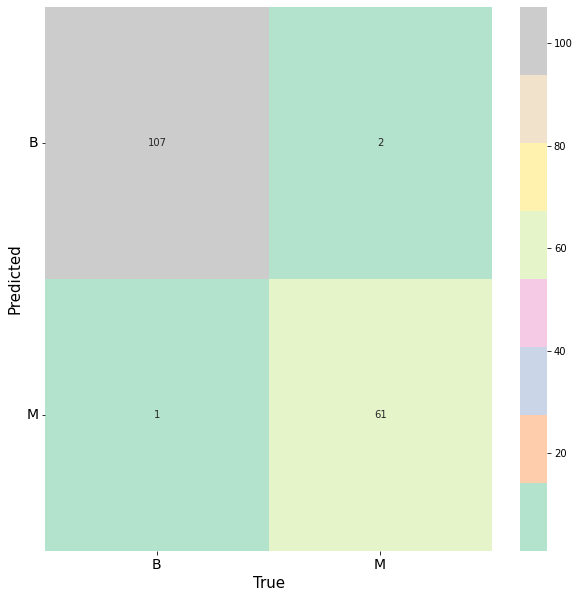

In [1621]:
#Confusion matrix
plt.figure(figsize=(10,10))
labels=np.unique(invy_test)
sns.heatmap(cm,cmap='Pastel2',annot=True,fmt='d')
plt.ylabel("Predicted",fontsize=15)
plt.xlabel("True",fontsize=15)
plt.yticks(np.arange(len(labels))+0.5,labels,fontsize=14,rotation='horizontal')
plt.xticks(np.arange(len(labels))+0.5,labels,fontsize=14)
plt.show()

In [1622]:
print(classification_report(invy_test,invyhat_test))

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [1623]:
y_score=clf.best_estimator_.decision_function(X_test)

In [1624]:
fpr,tpr,threshold=roc_curve(y_test,y_score)
print("AUC score is : {}".format(auc(fpr,tpr)))#AUC score

AUC score is : 0.9951499118165785


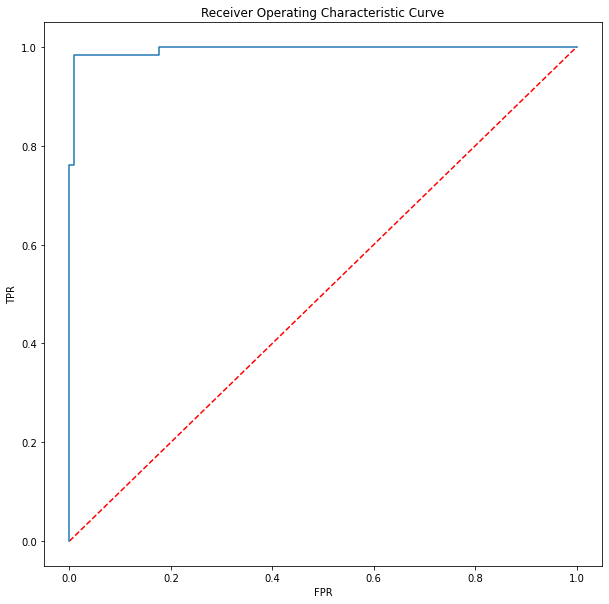

In [1625]:
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.title("Receiver Operating Characteristic Curve")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()#Plotting the ROC with the hope to get a better threshold

In [1626]:
#Best threshold
specificity=1-fpr
Gmean=np.sqrt(tpr*specificity)
idx=np.argmax(Gmean)#Largest geometric mean is chosen whose index will be used to find the best threshold above which we predict 
#Malignanat below Benign
print("Best Threshold : {} and its index : {}".format(threshold[idx],idx))
yhat_newtest=np.zeros(len(y_test))
for i in range(len(yhat_newtest)):
    if y_score[i]>threshold[idx]:
        yhat_newtest[i]=1 
yhat_newtest=yhat_newtest.astype(int)        

Best Threshold : -0.13261230567871302 and its index : 4


In [1627]:
invyhat_newtest=le.inverse_transform(yhat_newtest)
print(classification_report(invy_test,invyhat_newtest))#No better improvement so our accuracy is 98%. 

              precision    recall  f1-score   support

           B       0.98      0.99      0.99       108
           M       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



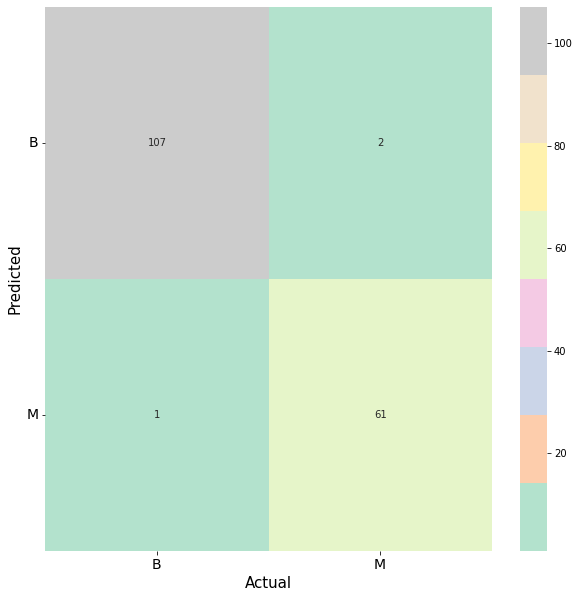

In [1628]:
plt.figure(figsize=(10,10))
labels=np.unique(invy_test)
sns.heatmap(confusion_matrix(invyhat_newtest,invy_test),cmap='Pastel2',annot=True,fmt='d')
plt.ylabel("Predicted",fontsize=15)
plt.xlabel("Actual",fontsize=15)
plt.yticks(np.arange(len(labels))+0.5,labels,fontsize=14,rotation='horizontal')
plt.xticks(np.arange(len(labels))+0.5,labels,fontsize=14)
plt.show()